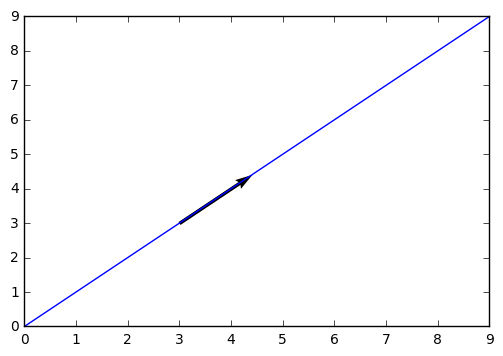

In [44]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
plt.plot([x for x in range (0,10)])
soa =np.array( [ [3,3,np.sqrt(2),np.sqrt(2)]]) 
X,Y,U,V = zip(*soa)
ax = plt.gca()
ax.quiver(X,Y,U,V,angles='xy',scale_units='xy',scale=1)
ax.set_xlim([-0,9])
ax.set_ylim([-0,9])

plt.draw()
plt.show()

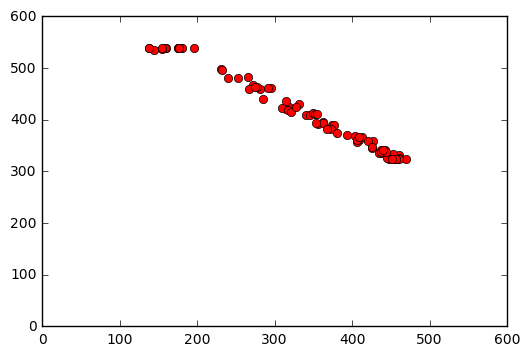

In [55]:
import numpy as np
import matplotlib.pyplot as plt

lines = [[[318, 425, 362, 395]],
[[315, 420, 356, 392]],
[[340, 409, 362, 394]],
[[310, 423, 353, 393]],
[[409, 360, 437, 341]],
[[406, 357, 435, 336]],
[[196, 538, 469, 324]],
[[176, 539, 374, 390]],
[[266, 482, 413, 367]],
[[376, 390, 461, 326]],
[[427, 359, 460, 332]],
[[231, 498, 404, 368]],
[[420, 358, 453, 333]],
[[175, 538, 253, 480]],
[[160, 538, 455, 324]],
[[179, 538, 460, 326]],
[[232, 497, 460, 325]],
[[180, 538, 272, 468]],
[[406, 361, 456, 324]],
[[159, 538, 373, 383]],
[[159, 538, 267, 460]],
[[159, 539, 453, 325]],
[[317, 418, 447, 324]],
[[425, 345, 439, 335]],
[[138, 538, 380, 374]],
[[144, 535, 285, 440]],
[[240, 481, 437, 338]],
[[138, 539, 321, 415]],
[[368, 382, 445, 326]],
[[281, 460, 345, 410]],
[[295, 461, 349, 414]],
[[332, 430, 352, 412]],
[[292, 462, 354, 412]],
[[409, 366, 442, 341]],
[[155, 537, 457, 325]],
[[277, 463, 444, 337]],
[[155, 538, 393, 371]],
[[175, 538, 275, 463]],
[[176, 538, 328, 424]],
[[314, 436, 440, 341]],
[[425, 347, 452, 324]]]

plt.figure()
for line in lines:
     for x1,y1,x2,y2 in line:
        plt.plot([x1,x2], [y1,y2], 'ro')

plt.axis([0, 600, 0, 600])
        
plt.draw()
plt.show()

vx [ 0.80845994]
vy [-0.58855116]
x [ 332.04876709]
y [ 417.42681885]


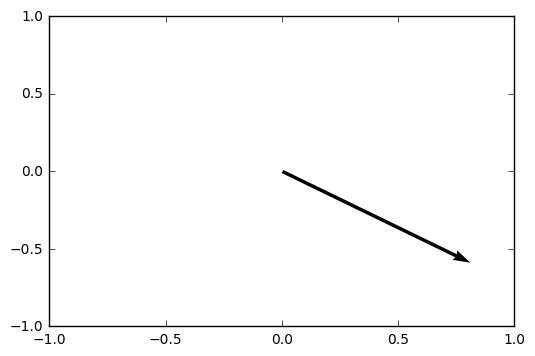

In [95]:
import cv2

points = []
for line in lines:
     for x1,y1,x2,y2 in line:
        points.append((x1,y1))
        points.append((x2,y2))
        
[vx,vy,x,y] = cv2.fitLine(np.array(points, dtype=np.int32), cv2.DIST_L2,0,0.01,0.01)
print("vx", vx)
print("vy", vy)
print("x", x)
print("y", y)
plt.figure()

ax = plt.gca()
ax.quiver(0,0,vx[0],vy[0],angles='xy',scale_units='xy',scale=1)
plt.axis([-1, 1, -1, 1])

plt.draw()
plt.show()

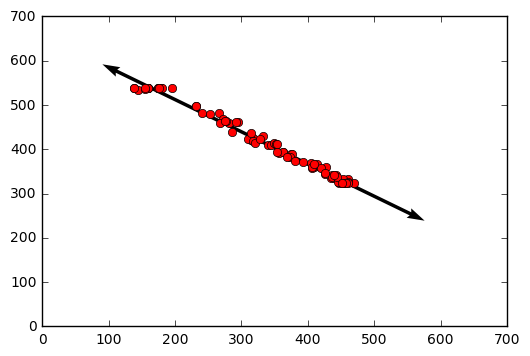

In [102]:
plt.figure()

for line in lines:
     for x1,y1,x2,y2 in line:
        plt.plot([x1,x2], [y1,y2], 'ro')
        
ax = plt.gca()
ax.quiver(x,y,vx[0]*-300,vy[0]*-300,angles='xy',scale_units='xy',scale=1)
ax.quiver(x,y,vx[0]*300,vy[0]*300,angles='xy',scale_units='xy',scale=1)

plt.axis([0, 700, 0, 700])

plt.draw()
plt.show()

Slope [-0.72799051]
Intercept [ 659.15515137]


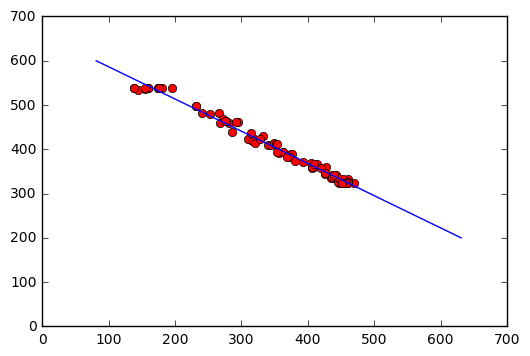

In [110]:
slope = vy / vx
intercept = y - (slope * x)
print("Slope", slope)
print("Intercept", intercept)

startY = 200
endY = 600
startX = (startY - intercept) / slope
endX = (endY - intercept) / slope

plt.figure()

for line in lines:
     for x1,y1,x2,y2 in line:
        plt.plot([x1,x2], [y1,y2], 'ro')
        
plt.plot([startX, endX], [startY, endY])
plt.axis([0, 700, 0, 700])

plt.draw()
plt.show()

269.6341463414635 394.4634146341463 463.34146341463406 371.5121951219512
661.694836016 -0.735638921454


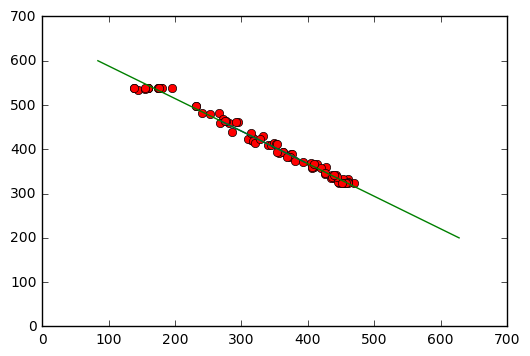

In [126]:
x1Avg = 0
x2Avg = 0
y1Avg = 0
y2Avg = 0
n = 1

for line in lines:
     for x1,y1,x2,y2 in line:
        x1Avg = x1Avg + (x1 - x1Avg)/n
        x2Avg = x2Avg + (x2 - x2Avg)/n
        y1Avg = y1Avg + (y1 - y1Avg)/n
        y2Avg = y2Avg + (y2 - y2Avg)/n
        n += 1
        
print(x1Avg, x2Avg, y1Avg, y2Avg)

[slope, intercept] = np.polyfit([x1Avg, x2Avg], [y1Avg, y2Avg], 1)

print(intercept, slope)

startY = 200
endY = 600
startX = (startY - intercept) / slope
endX = (endY - intercept) / slope

plt.figure()

for line in lines:
     for x1,y1,x2,y2 in line:
        plt.plot([x1,x2], [y1,y2], 'ro')
        
ax = plt.gca()
plt.plot([x1Avg, x2Avg], [y1Avg, y2Avg])
plt.plot([startX, endX], [startY, endY])

plt.axis([0, 700, 0, 700])

plt.draw()
plt.show()